# 简单分类器
- 时间复杂度：低
- 空间复杂度：高

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')  # 不打印警告
from a_Data_preprocessing import load_xy, vocabs
from b_metrics import metric, Timer
%matplotlib inline
from numpy import zeros

## 数据加载、预处理

In [2]:
X_train, X_test, y_train, y_test = load_xy(1)

def ls_of_w2id(ls_of_wids):
    length = len(ls_of_wids)
    ls_of_wid = zeros((length, vocabs))
    for i in range(length):
        for wid in ls_of_wids[i]:
            ls_of_wid[i, wid - 1] += 1
    return ls_of_wid  # 句向量

X_train = ls_of_w2id(X_train)
X_test = ls_of_w2id(X_test)

## 评估函数

In [3]:
def metrics(clf):
    t = Timer()  # 计时器
    y_pred = clf().fit(X_train, y_train).predict(X_test)
    metric(y_test, y_pred)

### 贝叶斯

                precision    recall  f1-score   support

          car_       0.97      0.95      0.96       409
    education_       0.86      0.85      0.85       410
entertainment_       0.70      0.88      0.78       375
      fashion_       0.80      0.76      0.78       394
      finance_       0.84      0.79      0.81       402
     military_       0.72      0.86      0.78       343
     politics_       0.76      0.62      0.68       400
      science_       0.80      0.75      0.78       372
       sports_       0.99      0.97      0.98       393

     micro avg       0.83      0.83      0.83      3498
     macro avg       0.83      0.83      0.82      3498
  weighted avg       0.83      0.83      0.83      3498



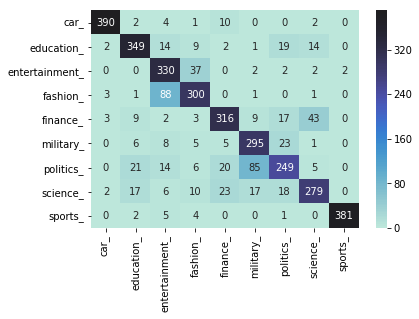

0.42分钟


In [4]:
from sklearn.naive_bayes import MultinomialNB
metrics(MultinomialNB)

### 逻辑回归

D:\Software\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


                precision    recall  f1-score   support

          car_       0.97      0.93      0.95       409
    education_       0.89      0.90      0.90       410
entertainment_       0.76      0.82      0.79       375
      fashion_       0.76      0.81      0.78       394
      finance_       0.89      0.83      0.86       402
     military_       0.76      0.80      0.78       343
     politics_       0.74      0.72      0.73       400
      science_       0.84      0.78      0.81       372
       sports_       0.99      0.96      0.97       393

     micro avg       0.84      0.84      0.84      3498
     macro avg       0.84      0.84      0.84      3498
  weighted avg       0.85      0.84      0.84      3498



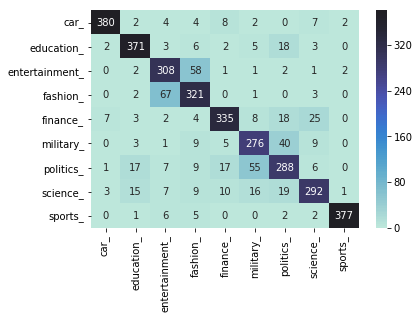

2.23分钟


In [5]:
from sklearn.linear_model import LogisticRegression
metrics(LogisticRegression)

### 随机森林

                precision    recall  f1-score   support

          car_       0.93      0.96      0.95       409
    education_       0.77      0.89      0.82       410
entertainment_       0.72      0.86      0.78       375
      fashion_       0.79      0.76      0.77       394
      finance_       0.77      0.81      0.79       402
     military_       0.74      0.76      0.75       343
     politics_       0.69      0.57      0.62       400
      science_       0.86      0.68      0.76       372
       sports_       0.98      0.94      0.96       393

     micro avg       0.80      0.80      0.80      3498
     macro avg       0.80      0.80      0.80      3498
  weighted avg       0.81      0.80      0.80      3498



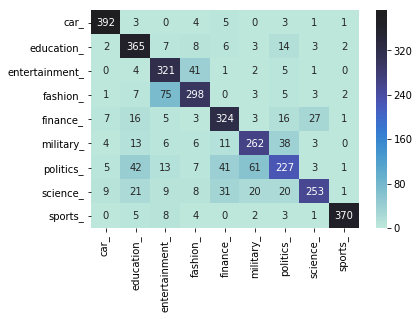

3.25分钟


In [6]:
from sklearn.ensemble import RandomForestClassifier
metrics(RandomForestClassifier)